# 一、資料匯入及預處理

### 資料來源：https://www.kaggle.com/liujiaqi/hr-comma-sepcsv

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['font.family']='DFKai-SB' #顯示中文(for Win10)，可自行更換可用字體
plt.rcParams['axes.unicode_minus']=False #正常顯示負號

df = pd.read_csv("HR_comma_sep.csv", encoding='big5')
print(df.shape)
df.head()

(14999, 10)


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### One-hot-Encoding

In [131]:
df_job = pd.get_dummies(df['dept'])
df_job.sample(4)

,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
6639,0,0,0,0,0,1,0,0,0,0
10979,1,0,0,0,0,0,0,0,0,0
12980,0,0,0,0,0,1,0,0,0,0
1039,0,0,0,0,0,0,0,0,1,0


In [132]:
df_ml = pd.merge(df, df_job, left_index=True, right_index=True)
df_ml.sample(4)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
13424,0.93,0.95,5,176,6,0,0,1,accounting,medium,0,0,1,0,0,0,0,0,0,0
3359,0.78,0.96,4,111,2,0,0,0,sales,high,0,0,0,0,0,0,0,1,0,0
8220,0.50,0.50,5,166,2,0,0,0,support,medium,0,0,0,0,0,0,0,0,1,0
2849,0.65,0.72,3,134,3,0,0,0,sales,low,0,0,0,0,0,0,0,1,0,0


### Label Encoding

In [133]:
df_ml['salary_rank'] = df_ml['salary'].replace({'low':1, 'medium':2, 'high':3})
df_ml.sample(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,...,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,salary_rank
13670,0.84,0.73,4,197,3,0,0,1,technical,low,...,0,0,0,0,0,0,0,0,1,1
6371,0.70,0.73,4,240,2,1,0,0,technical,medium,...,0,0,0,0,0,0,0,0,1,2
1966,0.10,0.98,6,265,4,0,1,0,technical,low,...,0,0,0,0,0,0,0,0,1,1
7432,1.00,0.97,5,141,2,0,0,0,accounting,medium,...,0,1,0,0,0,0,0,0,0,2
14641,0.89,0.65,5,195,6,0,1,0,support,low,...,0,0,0,0,0,0,0,1,0,1


In [134]:
#去除Nan及空白欄
df_ml = df_ml.dropna().reset_index(drop=True)

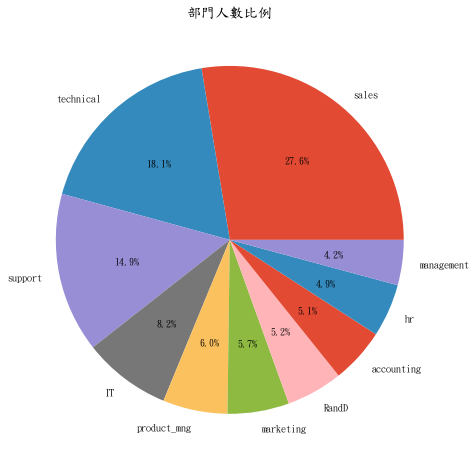

In [135]:
#部門人數比例
plt.figure(figsize=(12,8))
plt.title('部門人數比例')
lbs=df['dept'].value_counts().index
plt.pie(df['dept'].value_counts(normalize= True),labels =lbs,autopct='%1.1f%%')
plt.show()

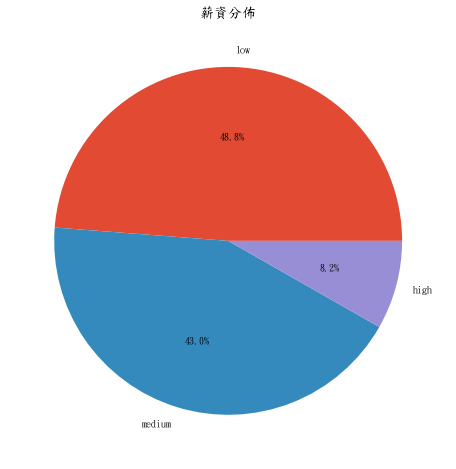

In [136]:
#薪資分佈
plt.figure(figsize=(12,8))
plt.title('薪資分佈')
lbs=df['salary'].value_counts().index
plt.pie(df['salary'].value_counts(normalize= True),labels =lbs,autopct='%1.1f%%')
plt.show()

## 相關性分析

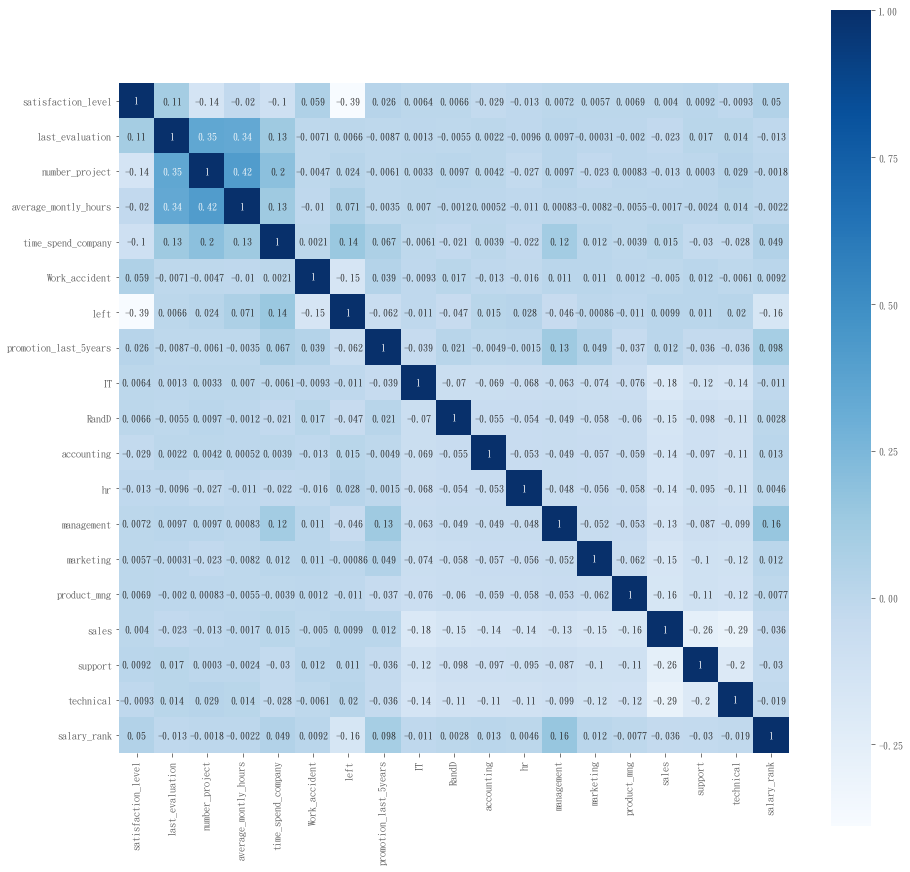

In [137]:
import seaborn as sns
plt.figure(figsize=(15,15))
corr = df_ml.corr()
sns.heatmap(corr, square=True, annot=True, cmap='Blues')
plt.show()

c:\users\jeff\ml_1\pyds\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


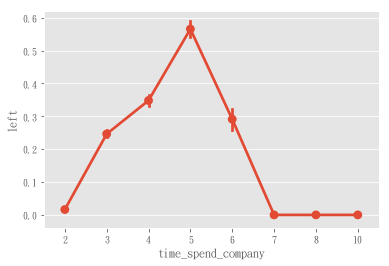

In [138]:
sns.pointplot(x = 'time_spend_company',y = 'left',data = df)
plt.show()

In [139]:
from sklearn.model_selection import train_test_split

features = ['satisfaction_level', 'last_evaluation', 'number_project',
           'average_montly_hours', 'time_spend_company', 'Work_accident',
           'promotion_last_5years', 'IT', 'RandD', 'accounting','hr', 
           'management', 'marketing', 'product_mng','sales', 'support',
           'technical', 'salary_rank']
X = df_ml[features]
y = df_ml['left']
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3)

## 標準化

In [140]:
#標準化
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

c:\users\jeff\ml_1\pyds\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\jeff\ml_1\pyds\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """
c:\users\jeff\ml_1\pyds\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


# 二、單一分類器

## 決策分類樹

In [161]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

tree = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree.fit(X_train_std, y_train)
print(metrics.classification_report(y_test, tree.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, tree.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3442
           1       0.96      0.92      0.94      1058

   micro avg       0.97      0.97      0.97      4500
   macro avg       0.97      0.96      0.96      4500
weighted avg       0.97      0.97      0.97      4500

[[3406   36]
 [  83  975]]


## KNN

In [162]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train_std, y_train)
print(metrics.classification_report(y_test, knn.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, knn.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      3442
           1       0.92      0.92      0.92      1058

   micro avg       0.96      0.96      0.96      4500
   macro avg       0.95      0.95      0.95      4500
weighted avg       0.96      0.96      0.96      4500

[[3358   84]
 [  84  974]]


## SVC

In [163]:
from sklearn.svm import SVC

svc = SVC(C=1.0, kernel='rbf')
svc.fit(X_train_std, y_train)
print(metrics.classification_report(y_test, svc.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, svc.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3442
           1       0.89      0.90      0.89      1058

   micro avg       0.95      0.95      0.95      4500
   macro avg       0.93      0.93      0.93      4500
weighted avg       0.95      0.95      0.95      4500

[[3326  116]
 [ 110  948]]


# 三、VotingClassifier

In [165]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

clf1 = DecisionTreeClassifier(max_depth=5)
clf2 = KNeighborsClassifier(n_neighbors=2)
#probability要設成True(同時計算每個分類的機率)，classification_report才能work
clf3 = SVC(kernel='rbf', probability=True)

vclf = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), 
                        ('svc', clf3)], voting='soft', 
                        weights=[1,1,1])
vclf.fit(X_train_std, y_train)
print(metrics.classification_report(y_test, vclf.predict(X_test_std)))
print(metrics.confusion_matrix(y_test, vclf.predict(X_test_std)))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3442
           1       0.93      0.92      0.93      1058

   micro avg       0.97      0.97      0.97      4500
   macro avg       0.95      0.95      0.95      4500
weighted avg       0.96      0.97      0.97      4500

[[3373   69]
 [  88  970]]


# 四、Bagging

### 基於決策樹的學習演算法可以不用標準化沒關係，而且訓練速度通常較快

In [166]:
from sklearn.ensemble import BaggingClassifier

bagc = BaggingClassifier(n_estimators=100, oob_score=True)
bagc.fit(X,y)
print('oob score:', bagc.oob_score_)

oob score: 0.9910660710714048


In [169]:
from sklearn.ensemble import BaggingClassifier

bagc = BaggingClassifier(n_estimators=100)
bagc.fit(X_train, y_train)
print(metrics.classification_report(y_test, bagc.predict(X_test)))
print(metrics.confusion_matrix(y_test, bagc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3442
           1       0.99      0.95      0.97      1058

   micro avg       0.99      0.99      0.99      4500
   macro avg       0.99      0.97      0.98      4500
weighted avg       0.99      0.99      0.99      4500

[[3428   14]
 [  53 1005]]


# 五、隨機森林(Random Forest)

In [170]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, criterion='gini', max_features='auto', oob_score=True)
rfc.fit(X,y)
print("oob score:", rfc.oob_score_)

oob score: 0.992199479965331


In [171]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
print(metrics.classification_report(y_test, rfc.predict(X_test)))
print(metrics.confusion_matrix(y_test, rfc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3442
           1       0.99      0.96      0.98      1058

   micro avg       0.99      0.99      0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500

[[3436    6]
 [  43 1015]]


# 六、AdaBoost

In [172]:
from sklearn.ensemble import AdaBoostClassifier
adbc =AdaBoostClassifier(n_estimators=100)
adbc.fit(X_train, y_train)
print(metrics.classification_report(y_test, adbc.predict(X_test)))
print(metrics.confusion_matrix(y_test, adbc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3442
           1       0.92      0.91      0.91      1058

   micro avg       0.96      0.96      0.96      4500
   macro avg       0.94      0.94      0.94      4500
weighted avg       0.96      0.96      0.96      4500

[[3353   89]
 [  96  962]]
